# Project 2
## Github Repo: [Link](https://)

### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# Load training data
with open('/content/drive/MyDrive/X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('/content/drive/MyDrive/y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

# Load test data
with open('/content/drive/MyDrive/X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

with open('/content/drive/MyDrive/y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2741, 192, 192, 3), (2741, 3), (1291, 192, 192, 3), (1291, 3))

### Visualize Images that Demonstrate When X-Rays Show COVID Positivity and When They Do Not.

In [ ]:
y_train.columns

Index(['COVID', 'NORMAL', 'PNEUMONIA'], dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def visualize_images_by_label(X, y, target_label, num_images=3):
    # Get the indices where the target_label is True
    indices = np.where(y[target_label] == True)[0]

    # Randomly select the few images based on the specified number
    selected_indices = random.sample(list(indices), num_images)

    # Create a plot to display the images
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

    for ax, idx in zip(axs, selected_indices):
        ax.imshow(X[idx])  # Show the image
        ax.set_title(f'{target_label}')  # Show the label
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

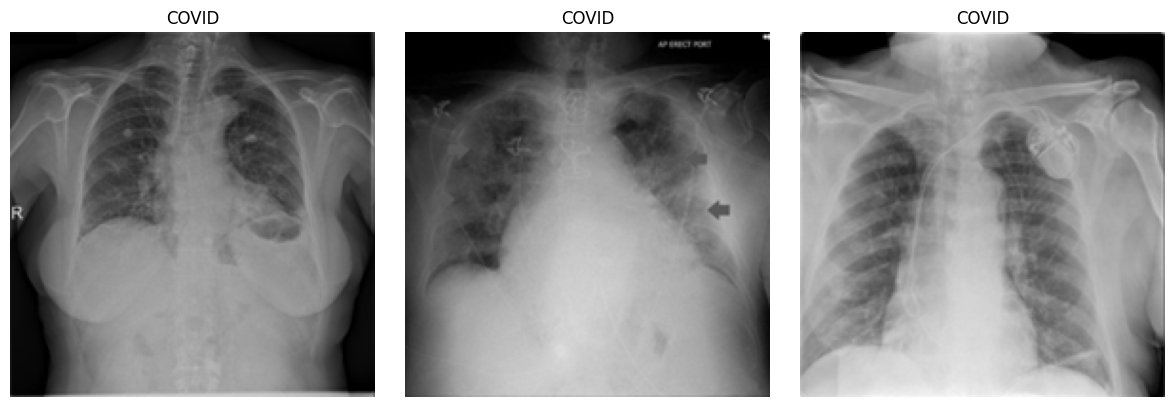

In [ ]:
target_label = 'COVID'
visualize_images_by_label(X_train, y_train, target_label)

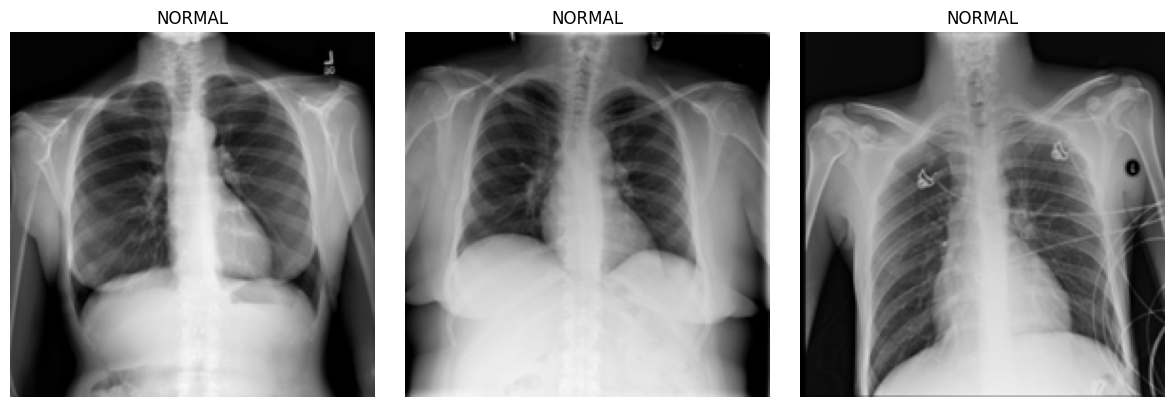

In [ ]:
target_label = 'NORMAL'
visualize_images_by_label(X_train, y_train, target_label)

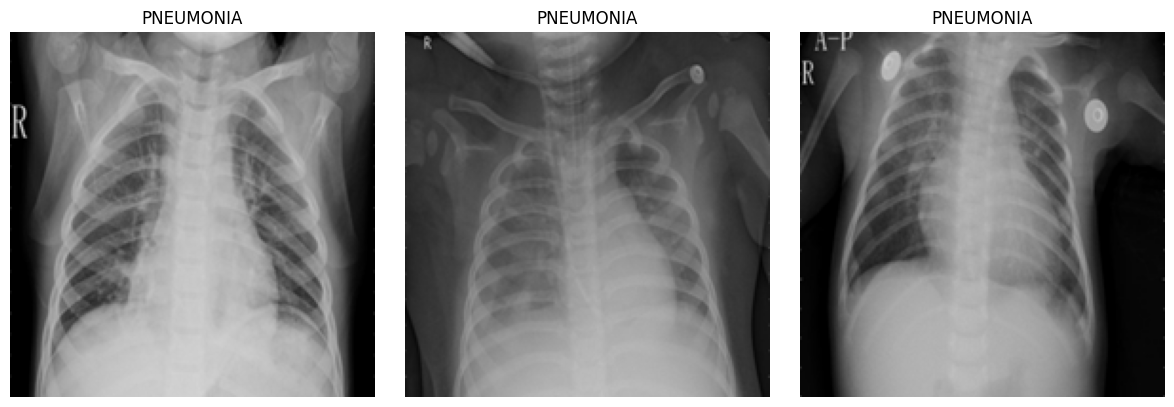

In [ ]:
target_label = 'PNEUMONIA'
visualize_images_by_label(X_train, y_train, target_label)

### Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful. Who could benefit from a model like this? Explain.

The dataset consists of chest X-ray images categorized into three classes: viral pneumonia, COVID-19, and normal chest images. The number of images in each category is 1,345 for viral pneumonia, 3,616 for COVID-19, and 10,192 for normal chest images. This dataset consists of six different sub-databases. The COVID-19 data was developed by the authors from collected and publicly available sources. The normal and viral pneumonia data were sourced from publicly available Kaggle databases.

COVID-19 is a rapidly spreading pandemic. Therefore, it is necessary to implement effective screening and immediate medical responses for infected patients. During the COVID-19 outbreak, at first, the most commonly used technique for detecting the virus was Polymerase Chain Reaction (RT-PCR). However, this method has several drawbacks: it is manual, complicated, labor-intensive, time-consuming, and has a low positivity rate. Additionally, there is often a shortage of supplies and equipment, and it is expensive. Such a costly screening tool, combined with delayed test results, contributes to the spread of the disease and worsen the situation.


Typical chest X-ray (CXR) images may assist in the early screening of suspected cases. However, images of various viral pneumonias can be similar and overlap with other infectious and inflammatory lung diseases. This similarity makes it challenging for radiologists to distinguish COVID-19 from other viral pneumonias.


With the advent of more advanced image classification techniques, deep learning methods like CNN can help reveal features in images that are not apparent in the original data, aiding in making a definitive diagnosis of COVID-19 cases. Building a predictive model can help quickly and cost-effectively identify COVID-19 infections.


People in underdeveloped, developing, and developed countries will all benefit from this model because using a predictive model to classify COVID-19 cases from X-ray chest images is economical, effective, and accurate. It is also easy to implement.

### Run at least three prediction models to try to predict x-ray images well.
*   Use transfer learning for at least one of these models
*   Discuss which models performed better and point out relevant
hyper-parameter values for successful models.

In [ ]:

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Visualize the training history
def plot_history(history):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training History')  # Corrected quotation marks
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()  # Optional: adds a grid for better readability
    plt.show()

**Keras Convolutional Neural Network**

In [ ]:
model = Sequential()
model.add(Input(shape=(192, 192, 3))) # Define the input layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu')) # One fully-connected layer of 100 neurons.

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                  epochs=10, verbose=1,batch_size=32, validation_data=(X_test, y_test))

plot_history(history)

NameError: name 'Sequential' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


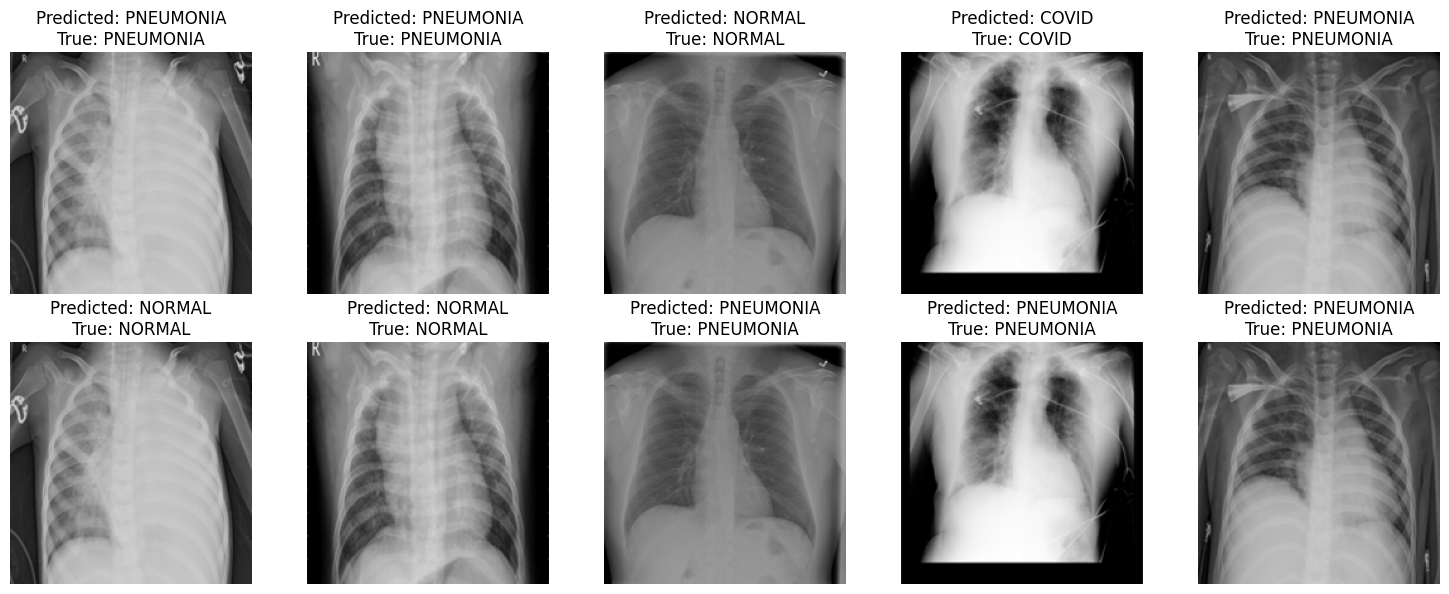

In [ ]:
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]

# Convert the true labels from one-hot encoded back to the flower names
true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(random_images[j], cmap='gray')  # Show the random images
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')
        ax[i, j].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

**Transfer Learning with VGG19 Model**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Load the VGG19 model without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the new model architecture
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)

# Create the model
model = Model(inputs=base_model.inputs, outputs=output)

with tf.device('/device:GPU:0'):
    # Callbacks
    mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.001)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, batch_size=64,
              epochs=10, verbose=1, validation_split=0.2, callbacks=[mc, red_lr, early_stopping])
    plot_history(history)

Epoch 1/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.3730 - loss: 1.3655 
Epoch 1: val_accuracy improved from -inf to 0.53552, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 1624s 47s/step - accuracy: 0.3741 - loss: 1.3603 - val_accuracy: 0.5355 - val_loss: 1.0505 - learning_rate: 0.0100
Epoch 2/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.5758 - loss: 0.9675 
Epoch 2: val_accuracy improved from 0.53552 to 0.64481, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 1631s 46s/step - accuracy: 0.5764 - loss: 0.9664 - val_accuracy: 0.6448 - val_loss: 0.7793 - learning_rate: 0.0100
Epoch 3/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.6073 - loss: 0.8148 
Epoch 3: val_accuracy improved from 0.64481 to 0.67395, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 1668s 48s/step - accuracy: 0.6073 - loss: 0.8148 - val_accuracy: 0.6740 - val_loss: 0.6660 - learning_rate: 0.0100
Epoch 4/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


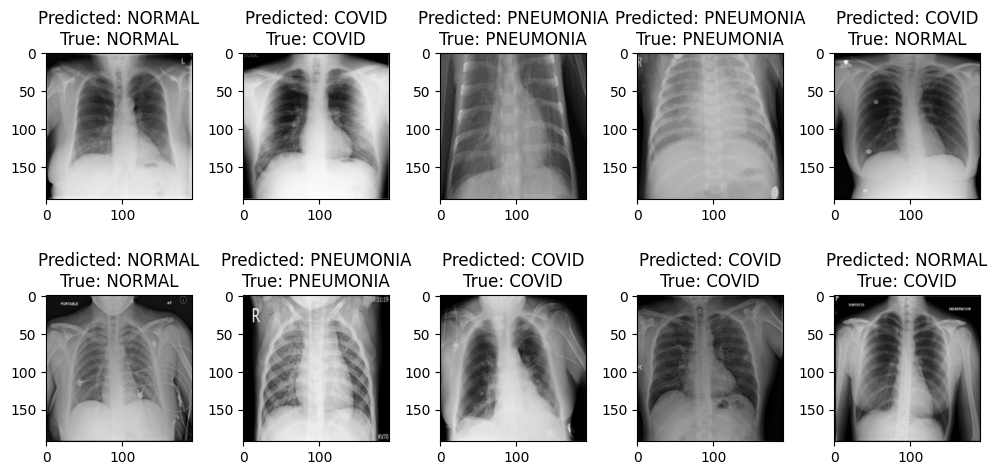

In [ ]:
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number
true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

**Transfer Learning with ResNet Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

for layer in base_model.layers:
    layer.trainable = False

gap1 = GlobalAveragePooling2D()(base_model.output)   # Add global average pooling
output = Dense(3, activation='softmax')(gap1)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model

with tf.device('/device:GPU:0'):
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

  mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.001)
  early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

  # Train the model
  history = model.fit(X_train, y_train, batch_size=64,
                      epochs=10, verbose=1, validation_split=0.2,
                      callbacks=[mc, red_lr, early_stopping])
  plot_history(history)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3380 - loss: 1.4955
Epoch 1: val_accuracy improved from -inf to 0.34791, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 480s 14s/step - accuracy: 0.3381 - loss: 1.4895 - val_accuracy: 0.3479 - val_loss: 1.0950 - learning_rate: 0.0010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3500 - loss: 1.0947
Epoch 2: val_accuracy improved from 0.34791 to 0.42987, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 436s 12s/step - accuracy: 0.3500 - loss: 1.0947 - val_accuracy: 0.4299 - val_loss: 1.0894 - learning_rate: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5175 - loss: 1.0879
Epoch 3: val_accuracy did not improve from 0.42987
35/35 ━━━━━━━━━━━━━━━━━━━━ 403s 12s/step - accuracy: 0.5168 - loss: 1.0879 - val_accuracy: 0.3916 - val_loss: 1.0838 - learning_rate: 0.0010
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4244 - loss: 1.0846
Epoch 4: val_accura

In [ ]:
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number
true_labels = random_labels.idxmax(axis=1).values
# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

###Try to use augmented data to rerun at least one model and then discuss the
###results you observe.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,          # Random rotation up to 40 degrees
    width_shift_range=0.2,      # Random width shift
    height_shift_range=0.2,     # Random height shift
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True        # Random horizontal flip
)

datagen.fit(X_train)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

for layer in base_model.layers:
    layer.trainable = False

gap1 = GlobalAveragePooling2D()(base_model.output)   # Add global average pooling
output = Dense(3, activation='softmax')(gap1)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model

with tf.device('/device:GPU:0'):
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

  mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.001)
  early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

  history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                      steps_per_epoch=len(X_train) // 64,
                      epochs=10,
                      validation_data=(X_test, y_test),
                      callbacks=[mc, red_lr, early_stopping])
  plot_history(history)

In [ ]:
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number

true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

### Discuss which models you tried and which models performed better and point
### out relevant hyper-parameter values for successful models.